# 🏥 Problem Definition
# 🎯 Objective:

#The goal is to determine whether a person has diabetes or not based on various medical and health-related parameters.

#📌 This is a classification problem, where the objective is to use a machine learning model to predict whether the outcome is diabetic (1) or non-diabetic (0) given new input data.

In [8]:
# 📥 Data Collection
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# 📂 Data Partitioning & Model Tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# 🤖 Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# ✅ Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 🔎 Model Explainability (SHAP)
import shap


In [9]:
# 1) First, we will show the available handlers and their formats.
import logging, sys

print("Current root handlers and their format strings:")
for i, h in enumerate(logging.root.handlers):
    fmt = None
    try:
        fmt = h.formatter._fmt if h.formatter else None
    except Exception as e:
        fmt = f"<error reading formatter: {e}>"
    print(i, type(h), "format:", fmt)

# 2)If there are old/broken handlers, we will delete them.
for h in logging.root.handlers[:]:
    logging.root.removeHandler(h)

# 3) We add new, correct formatters and handlers (file + console)
logger = logging.getLogger()         # root logger
logger.setLevel(logging.INFO)

correct_fmt = "%(asctime)s - %(levelname)s - %(message)s"
formatter = logging.Formatter(correct_fmt)

# File handler
fh = logging.FileHandler("Info_Log.log", mode="a", encoding="utf-8")
fh.setFormatter(formatter)
logger.addHandler(fh)

# Console/stream handler (usually useful for Jupyter)
sh = logging.StreamHandler(sys.stdout)
sh.setFormatter(formatter)
logger.addHandler(sh)

# 4) Test: now we write test logs
logger.info("Logging reconfigured successfully (test message).")
logger.error("If you see this message, logging is working.")

# 5) Now our file reading code:
try:
    import pandas as pd
    url = "https://raw.githubusercontent.com/rasulbekdeveloper907/MY_PORTFOLIO/main/DIABETES_PREDICTION/diabetes_prediction_dataset.csv"
    df = pd.read_csv(url)
    logger.info("Data Set Uploaded Successfully")
except FileNotFoundError as e:
    logger.error("Data Set Not Found: %s", e)
except Exception as e:
    logger.exception("Other error while loading dataset: %s", e)



Current root handlers and their format strings:
0 <class 'logging.FileHandler'> format: %(asctime)s - %(levelname)s - %(message)s
1 <class 'logging.StreamHandler'> format: %(asctime)s - %(levelname)s - %(message)s
2025-08-23 08:15:53,163 - INFO - Logging reconfigured successfully (test message).
2025-08-23 08:15:53,165 - ERROR - If you see this message, logging is working.
2025-08-23 08:15:54,430 - INFO - Data Set Uploaded Successfully


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Diabetes Dataset Diagram Components

- **gender** (Male or female)
- **age** (The number of years a person has lived.)
- **hypertension** (High blood pressure.)
- **heart_disease** (Any condition affecting the heart’s function.)
- **smoking_history**  (Whether a person has smoked in the past or currently smokes.)
- **bmi**  ((Body Mass Index) – A measure of body fat based on height and weight.))
- **HbA1c_level**  (A measure of average blood sugar levels over the past 2–3 months.)
- **blood_glucose_level** (The amount of sugar in the blood at a given time.)
- **diabetes** (A chronic condition where the body has high blood sugar levels.)


<Axes: xlabel='age', ylabel='Count'>

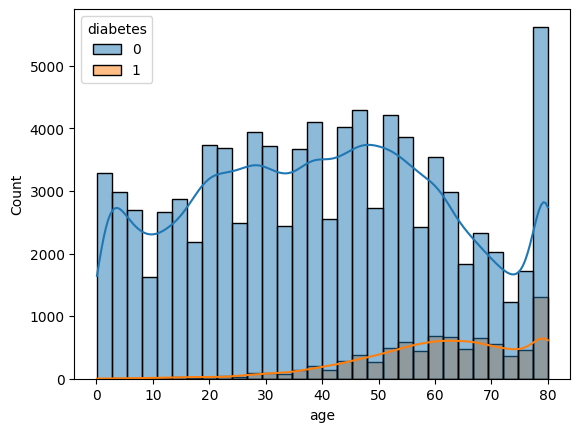

In [5]:
sns.histplot(data=df, x="age", hue="diabetes", kde=True, bins=30)

2025-08-17 16:01:59,357 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-17 16:01:59,425 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='diabetes', ylabel='bmi'>

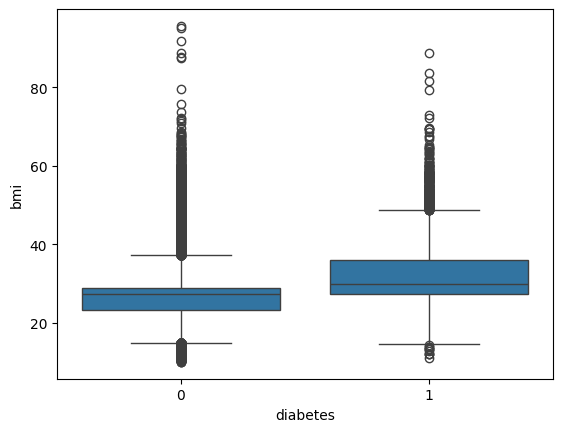

In [6]:
sns.boxplot(data=df, x="diabetes", y="bmi")

2025-08-17 16:02:11,809 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-17 16:02:11,863 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-17 16:02:11,977 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-17 16:02:12,028 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='hypertension', ylabel='count'>

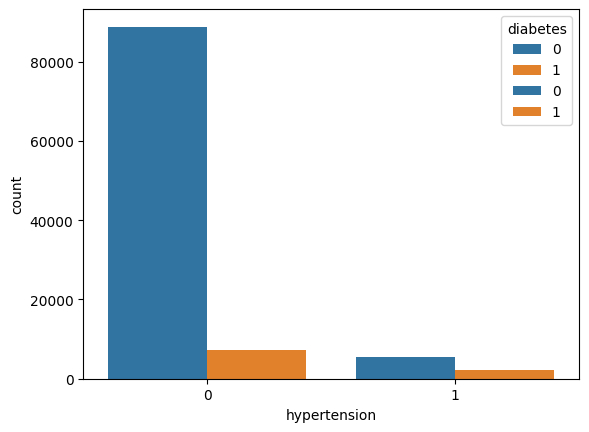

In [7]:
sns.countplot(data=df, x="hypertension", hue="diabetes")
sns.countplot(data=df, x="heart_disease", hue="diabetes")


C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_11592\2689454939.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['diabetes'] == 1], x="HbA1c_level", label="Diabetic", shade=True)
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_11592\2689454939.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['diabetes'] == 0], x="HbA1c_level", label="Non-Diabetic", shade=True)


<Axes: xlabel='HbA1c_level', ylabel='Density'>

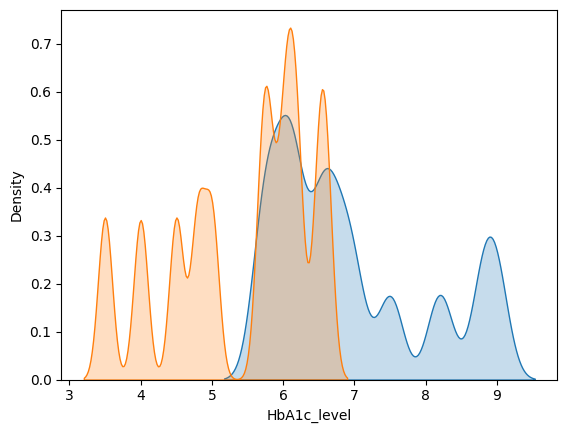

In [9]:
sns.kdeplot(data=df[df['diabetes'] == 1], x="HbA1c_level", label="Diabetic", shade=True)
sns.kdeplot(data=df[df['diabetes'] == 0], x="HbA1c_level", label="Non-Diabetic", shade=True)


2025-08-17 16:02:40,520 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-17 16:02:40,574 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

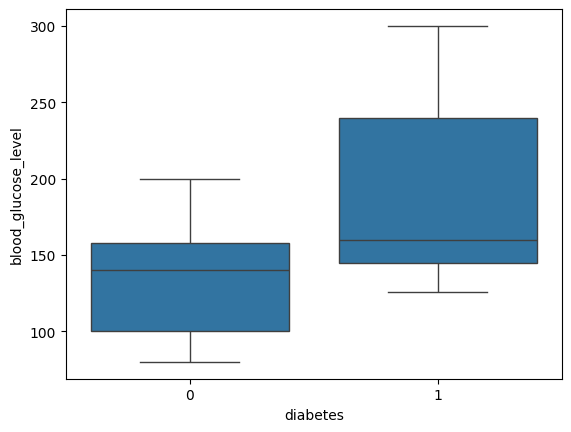

In [10]:
sns.boxplot(data=df, x="diabetes", y="blood_glucose_level")


<Axes: xlabel='smoking_history', ylabel='count'>

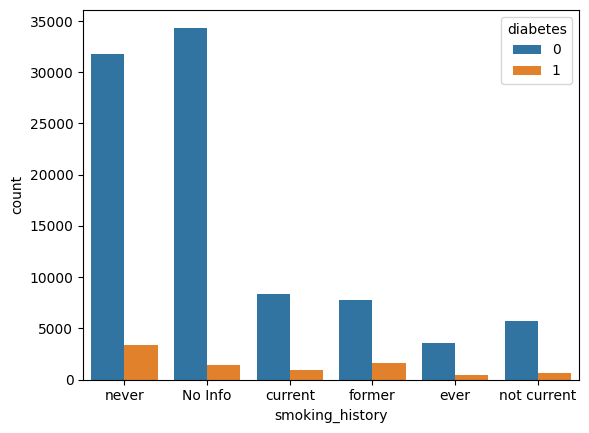

In [11]:
sns.countplot(data=df, x="smoking_history", hue="diabetes")


<Axes: xlabel='gender', ylabel='count'>

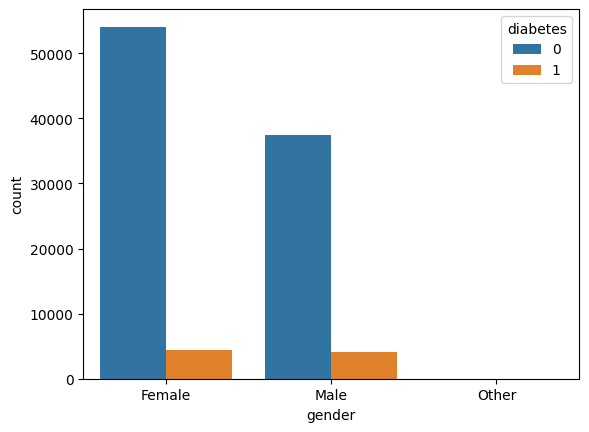

In [12]:
sns.countplot(data=df, x="gender", hue="diabetes")


<Axes: >

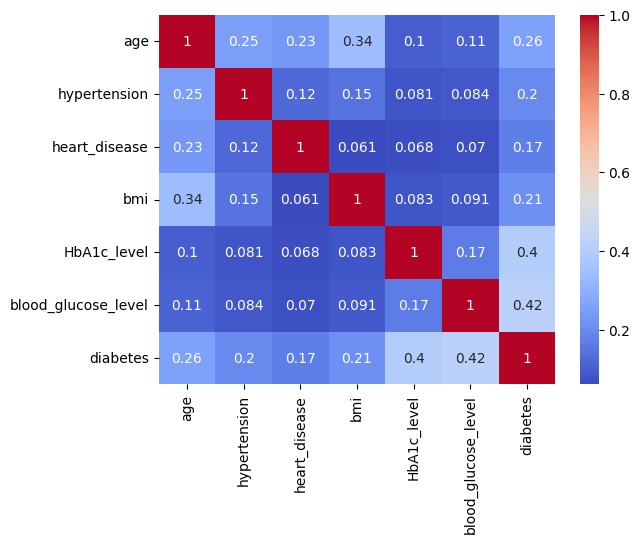

In [13]:
corr = df[["age", "hypertension", "heart_disease", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# 📊 Data Overview

### 🧮 Dataset Size:
- **100000  rows**
- **9 columns**

### 🧹 Data Cleaning Status:
- **The dataset is fully cleaned**

### 🔢 Column Types:
- **Most columns are numeric (float64, int64 and object)**



In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


## 📊Correlation Analysis with Air Quality

In this step:

- Only numeric columns are selected.
-  The correlation with `diabetes_dataset`is calculated. 
- Each column’s correlation with `diabetes_dataset` is sorted in order.
- The results are visualized using a **heatmap**.

🎯 Objective — to identify which features have the strongest impact on air quality.


In [3]:
print(df.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

# Convert "diabetes_dataset" to numeric before correlation:

In [5]:
df['diabetes'].unique()

array([0, 1])

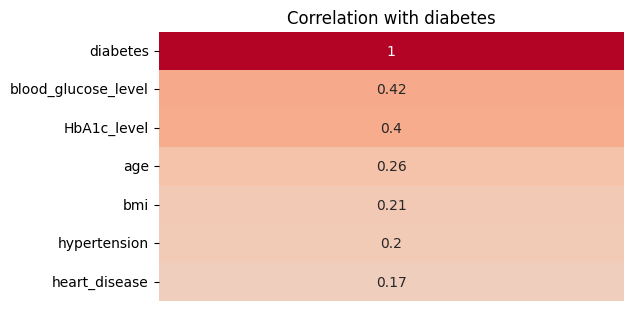

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['diabetes'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with diabetes')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()


In [7]:
# Select columns with correlation > 0.25
important_features = corr_target[corr_target > -0.95].index.tolist()

# We remove the target column
important_features = [feat for feat in important_features if feat != 'diabetes']

print("Important features:", important_features)


Important features: ['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease']


In [6]:
print(df.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [8]:
# Checking the number of values 0
ustunlar = ['gender', 'age', 'hypertension','heart_disease','smoking_history', 'bmi', 'HbA1c_level','blood_glucose_level', 'diabetes']

for col in ustunlar:
    zero_count = (df[col] == 0).sum()
    print(f"{col} the number of 0 values in the column: {zero_count}")

gender the number of 0 values in the column: 0
age the number of 0 values in the column: 0
hypertension the number of 0 values in the column: 92515
heart_disease the number of 0 values in the column: 96058
smoking_history the number of 0 values in the column: 0
bmi the number of 0 values in the column: 0
HbA1c_level the number of 0 values in the column: 0
blood_glucose_level the number of 0 values in the column: 0
diabetes the number of 0 values in the column: 91500


## 🛠️ Feature Engineering

In [7]:

from sklearn.preprocessing import  FunctionTransformer


def create_features(df: pd.DataFrame):
    df = df.copy()
    
    # Age groups
    df["age_group"] = pd.cut(df["age"], 
                             bins=[0,18,35,50,100], 
                             labels=["child","young","middle","old"])
    
    # BMI category
    df["bmi_category"] = pd.cut(df["bmi"], 
                                bins=[0,18.5,24.9,29.9,100], 
                                labels=["underweight","normal","overweight","obese"])
    
    # HbA1c threshold
    df["HbA1c_high"] = (df["HbA1c_level"] >= 6.5).astype(int)
    
    # Glucose threshold
    df["glucose_high"] = (df["blood_glucose_level"] >= 126).astype(int)
    
    # Smoker binary
    df["is_smoker"] = df["smoking_history"].apply(lambda x: 0 if x=="never" else 1)
    
    # Cardio risk (combo of hypertension + heart disease)
    df["cardio_risk"] = df["hypertension"] + df["heart_disease"]
    
    # Interaction features
    df["age_bmi"] = df["age"] * df["bmi"]
    df["bmi_HbA1c"] = df["bmi"] * df["HbA1c_level"]
    
    # Ratio
    df["glucose_HbA1c_ratio"] = df["blood_glucose_level"] / (df["HbA1c_level"]+1e-6)
    
    # Metabolic risk = bmi + HbA1c + glucose
    df["metabolic_risk"] = df["bmi"] + df["HbA1c_level"] + df["blood_glucose_level"]
    
    return df

# Transformer wrapper
feature_engineering = FunctionTransformer(create_features)

In [8]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

for col in df.columns:
    if df[col].dtype == "object":
        if df[col].nunique() <= 5:
            dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
            df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
        else:
            transformed = encoder.fit_transform(df[[col]])  # 2D array
            new_cols = [f"{col}_{cat}" for cat in encoder.categories_[0]]
            df = pd.concat([df.drop(columns=[col]),
                            pd.DataFrame(transformed, columns=new_cols, index=df.index)], axis=1)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  int64  
 8   gender_Male                  100000 non-null  int64  
 9   gender_Other                 100000 non-null  int64  
 10  smoking_history_No Info      100000 non-null  float64
 11  smoking_history_current      100000 non-null  float64
 12  smoking_history_ever         100000 non-null  float64
 13  

## 📏 Scaling (Data normalization)

### ⚙️ StandartScaler  
- Values in numeric columns are converted to the range **[0, 1]**.
- This helps the model learn **faster and more consistently**.
- Columns with different units are ensured to be in the **same range**.


In [11]:
scaler = StandardScaler()

def scaling_qil(df):
    numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.drop('diabetes')
    df[numerical_col] = scaler.fit_transform(df[numerical_col])
    return df
df=scaling_qil(df)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,-0.284439,4.936379,-0.321056,1.001706,0.047704,0,0.841358,-0.841046,-0.013418,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
1,0.538006,-0.284439,-0.202578,-0.000116,1.001706,-1.426210,0,0.841358,-0.841046,-0.013418,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512
2,-0.616691,-0.284439,-0.202578,-0.000116,0.161108,0.489878,0,-1.188554,1.188995,-0.013418,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
3,-0.261399,-0.284439,-0.202578,-0.583232,-0.492690,0.416183,0,0.841358,-0.841046,-0.013418,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512
4,1.515058,3.515687,4.936379,-1.081970,-0.679490,0.416183,0,-1.188554,1.188995,-0.013418,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512


- ✅ First we **check the target distribution** — if it is **right-skewed**,

- 🔄 Then we apply a **log transformation** — this makes the distribution more **symmetric** and **closer to normal**,

- 🚀  Then **the model can be built with a log transformed target**.


--- diabetes column statistics ---
count    100000.000000
mean          0.085000
std           0.278883
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes, dtype: float64




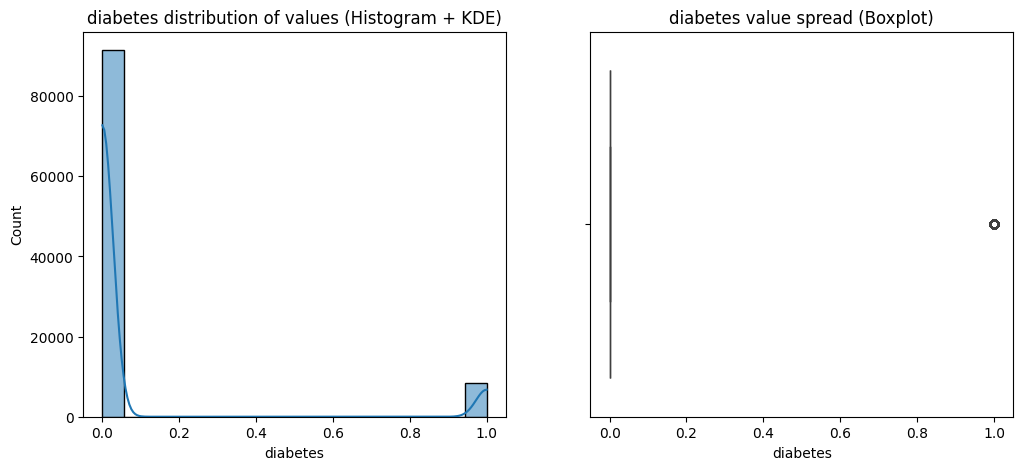

--- After log transformation diabetes_log column statistics ---
count    100000.000000
mean          0.058918
std           0.193307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.693147
Name: diabetes_log, dtype: float64




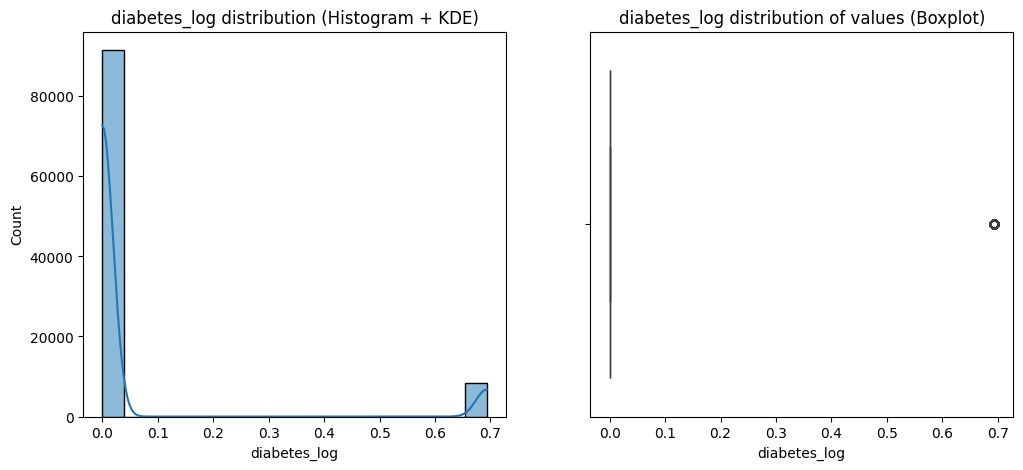

In [21]:

def target_distribution_check(df, target_col):
    print(f"--- {target_col} column statistics ---")
    print(df[target_col].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'{target_col} distribution of values (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col])
    plt.title(f'{target_col} value spread (Boxplot)')
    
    plt.show()

def log_transform_and_check(df, target_col):
    df[target_col + '_log'] = np.log1p(df[target_col])
    print(f"--- After log transformation {target_col}_log column statistics ---")
    print(df[target_col + '_log'].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col + '_log'], kde=True)
    plt.title(f'{target_col}_log distribution (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col + '_log'])
    plt.title(f'{target_col}_log distribution of values (Boxplot)')
    
    plt.show()

# Launch:
target_distribution_check(df, 'diabetes')

# Check the log transformation if necessary:
log_transform_and_check(df, 'diabetes')


### 📊 About log transformation

- ✅ **Log transformation** transformed the **right-skewed distribution** of `diabetes` into an almost **normal distribution**.
- 🚀 This transformation is **useful for your regression model** because most regression methods 
- 📈 **works more effectively on data that meets the normal distribution assumption**.


In [13]:
# --- 1. Libraries ---
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- 2. Target/Features separation ---
target = 'diabetes'   # classification uchun original target
X = df.drop(columns=[target])  
y = df[target]  

# --- 3. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Numeric columns selection ---
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- 5. Column transformer for scaling ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

# --- 6. Evaluation function ---
def evaluate_classification(y_true, y_pred, y_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1': f1_score(y_true, y_pred, average='weighted'),
    }
    if y_proba is not None:  # Agar modelda predict_proba bo'lsa
        try:
            metrics['ROC_AUC'] = roc_auc_score(y_true, y_proba[:,1])
        except:
            pass
    return metrics

# --- 7. Model lists ---
scaled_models = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'MLP': MLPClassifier(max_iter=300, random_state=42)
}

nonscaled_models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# --- 8. Results dict ---
results = {}

# --- 9. Fit scaled models ---
for name, model in scaled_models.items():
    pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
    results[name] = evaluate_classification(y_test, y_pred, y_proba)

# --- 10. Fit non-scaled models ---
for name, model in nonscaled_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    results[name] = evaluate_classification(y_test, y_pred, y_proba)

# --- 11. Results table ---
results_df = pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)
print("📊 Classification model evaluation results:")
print(results_df.round(4))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6800, number of negative: 73200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
📊 Classification model evaluation results:
                    Accuracy  Precision  Recall      F1  ROC_AUC
LightGBM              0.9716     0.9715  0.9716  0.9695   0.9788
MLP                   0.9712     0.9712  0.9712  0.9690   0.9760
XGBoost               0.9708     0.9703  0.9708  0.9688   0.9781
RandomForest          0.9702     0.9695  0.9702  0.9680   0.9

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='Blues_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:16: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


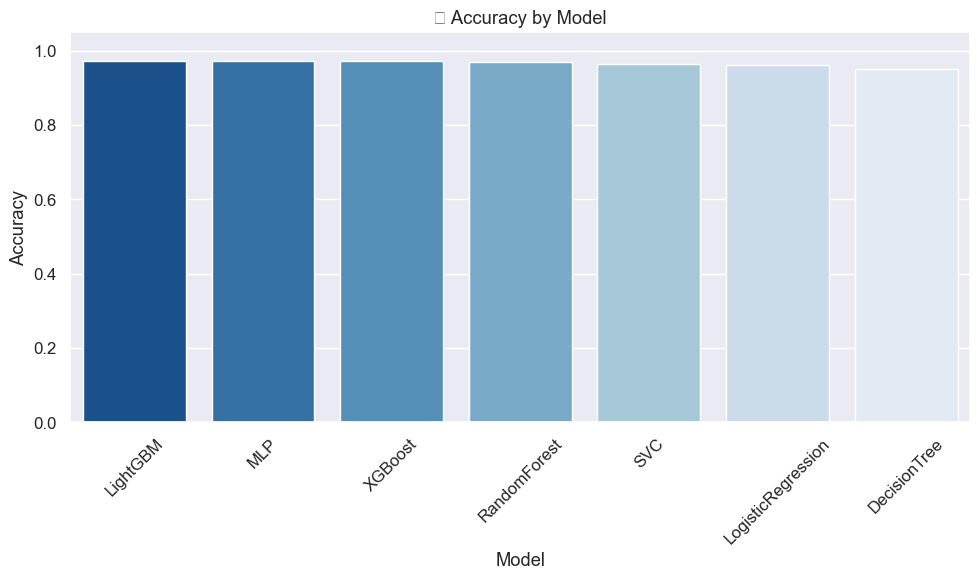

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Precision', data=results_df, palette='Oranges_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:27: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


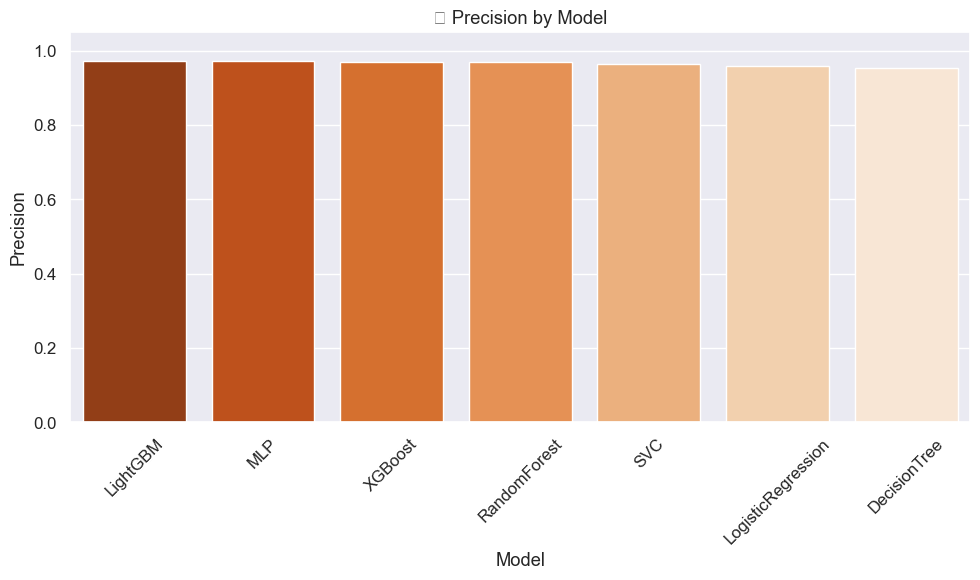

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Recall', data=results_df, palette='Greens_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


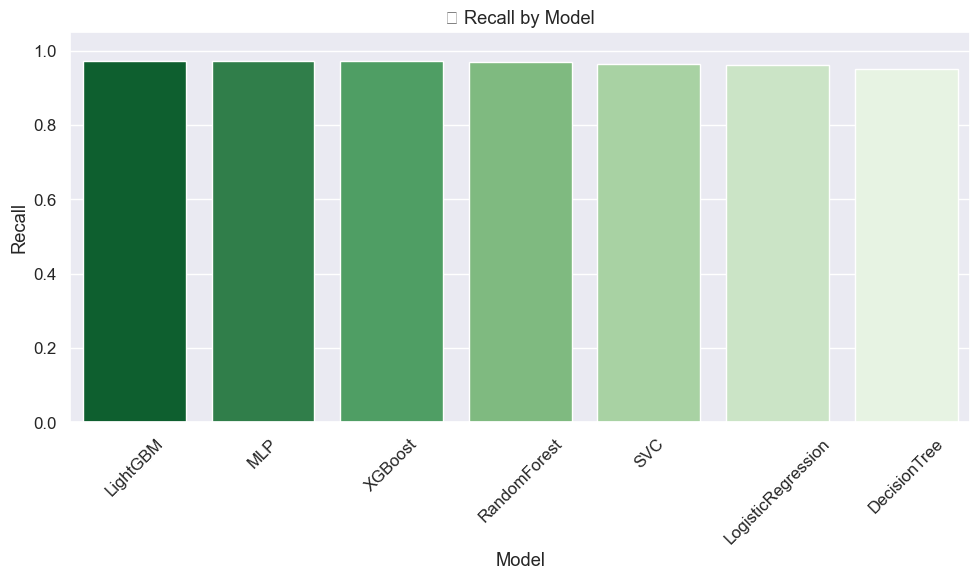

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='F1', data=results_df, palette='Purples_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:49: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:49: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.p

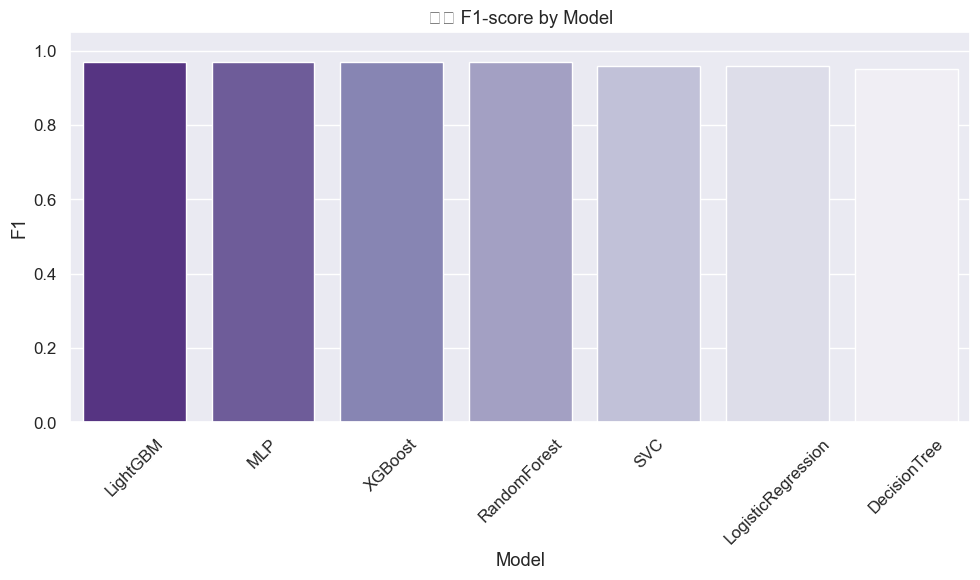

C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='ROC_AUC', data=results_df, palette='Reds_r')
C:\Users\Rasulbek_Ruzmetov\AppData\Local\Temp\ipykernel_6444\3356016488.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek_Ruzmetov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


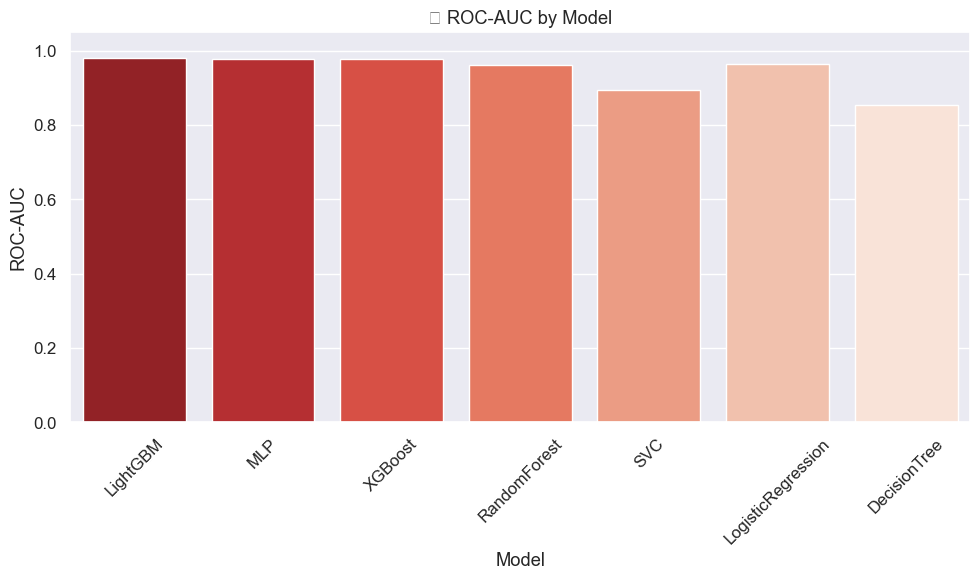

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)

# --- 1. Accuracy ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette='Blues_r')
plt.xticks(rotation=45)
plt.title('✅ Accuracy by Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# --- 2. Precision ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Precision', data=results_df, palette='Oranges_r')
plt.xticks(rotation=45)
plt.title('🎯 Precision by Model')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# --- 3. Recall ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Recall', data=results_df, palette='Greens_r')
plt.xticks(rotation=45)
plt.title('📊 Recall by Model')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# --- 4. F1-score ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='F1', data=results_df, palette='Purples_r')
plt.xticks(rotation=45)
plt.title('⚖️ F1-score by Model')
plt.ylabel('F1')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# --- 5. ROC-AUC ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='ROC_AUC', data=results_df, palette='Reds_r')
plt.xticks(rotation=45)
plt.title('📈 ROC-AUC by Model')
plt.ylabel('ROC-AUC')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


### ✅ General Conclusion:

#🔍 According to the model evaluation results, the **XGBoost** model showed the highest results in terms of **accuracy (R²)** and **reduction in root mean square error (RMSE)**.
#📌 However, in terms of **MAE**, the **RandomForest** model performed slightly better.


In [15]:
print("\n🧠 The best model for each classification metric:")

for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
    best = results_df[metric].idxmax()  # eng katta qiymat kerak
    print(f"{metric} best model: {best} -> {results_df.loc[best, metric]:.4f}")




🧠 The best model for each classification metric:
Accuracy best model: LightGBM -> 0.9717
Precision best model: LightGBM -> 0.9715
Recall best model: LightGBM -> 0.9717
F1 best model: LightGBM -> 0.9695


### 🔁 5-Fold Cross-Validation Results:

- 📉 **RMSE (MEAN)**: `0.1992 ± 0.0134`
- 📈 **MAE (MEAN)**: `0.0825`
- 🧩 **R² (MEAN)**: `0.9601`


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# --- Data preparation ---
target = 'diabetes'   # 
X = df.drop(columns=[target])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Rating function ---
def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1': f1_score(y_true, y_pred, average='weighted')
    }

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# --- Cross-validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    scores = evaluate(y_val, y_pred)
    acc_scores.append(scores['Accuracy'])
    prec_scores.append(scores['Precision'])
    rec_scores.append(scores['Recall'])
    f1_scores.append(scores['F1'])

# --- Outputting results ---
print(f"Cross-validation results (5-fold):")
print(f"Accuracy mean:  {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
print(f"Precision mean: {np.mean(prec_scores):.4f}")
print(f"Recall mean:    {np.mean(rec_scores):.4f}")
print(f"F1 mean:        {np.mean(f1_scores):.4f}")


Cross-validation results (5-fold):
Accuracy mean:  0.9699 ± 0.0009
Precision mean: 0.9692
Recall mean:    0.9699
F1 mean:        0.9677


### ✅ GridSearchCV Results

- 162 parameter combinations were tested with 5-fold CV.
- **Best settings**:
  - `max_depth`: 20
  - `max_features`: 'sqrt'
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 300

- **The best R²**: 0.9632

⚠️  R² turned out to be higher than the previous result (≈0.9967)!



In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# --- Data Preparation ---
target = 'diabetes'   # <-- classification target ustun
X = df.drop(columns=[target])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('lgbm', LGBMClassifier(random_state=42, n_jobs=-1))
])

# --- Custom scorer (F1-score) ---
f1_scorer = make_scorer(f1_score, average='weighted')
# Agar binary bo‘lsa, average='binary' qilib qo‘yishingiz mumkin

# --- Parameters grid (LightGBM uchun) ---
param_grid = {
    'lgbm__n_estimators': [100, 200, 300],
    'lgbm__num_leaves': [31, 50, 100],
    'lgbm__max_depth': [-1, 10, 20],        # -1 => cheksiz
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__min_child_samples': [5, 10, 20],
    'lgbm__subsample': [0.7, 0.9, 1.0],
    'lgbm__colsample_bytree': [0.7, 0.9, 1.0]
}

# --- GridSearchCV ---
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=f1_scorer,   # yoki 'accuracy', 'roc_auc'
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

# --- Results ---
print("GridSearchCV best parameters:", grid_search.best_params_)
print(f"GridSearchCV best F1-score: {grid_search.best_score_:.4f}")


### ✅ RandomizedSearchCV Results

- 30 parameter combinations were tested with 5-fold CV.
- **Best settings**:
  - `max_depth`: 25
  - `max_features`: log2
  - `min_samples_leaf`: 2
  - `min_samples_split`: 4
  - `n_estimators`: 264

- **Best R²**: 0.9625

⚠️ R² turned out to be higher than the previous result (≈0.9975)!




In [ ]:
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# --- Data Preparation ---
target = 'diabetes'   # Classification target
X = df.drop(columns=[target])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('lgbm', LGBMClassifier(random_state=42, n_jobs=-1))
])

# --- Custom scorer (masalan F1-score) ---
f1_scorer = make_scorer(f1_score, average='weighted')  
# Agar binary bo‘lsa, average='binary' ishlatishingiz mumkin

# --- Parameter distribution (LightGBM uchun) ---
param_dist = {
    'lgbm__n_estimators': randint(50, 500),
    'lgbm__num_leaves': randint(20, 150),
    'lgbm__max_depth': randint(3, 15),
    'lgbm__learning_rate': uniform(0.01, 0.3),
    'lgbm__min_child_samples': randint(5, 30),
    'lgbm__subsample': uniform(0.5, 0.5),      # [0.5, 1.0]
    'lgbm__colsample_bytree': uniform(0.5, 0.5) # [0.5, 1.0]
}

# --- RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring=f1_scorer,   # yoki 'accuracy', 'roc_auc'
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X, y)

print("RandomizedSearchCV best parameters:", random_search.best_params_)
print(f"RandomizedSearchCV best F1-score: {random_search.best_score_:.4f}")


# What is SHAP used for?

- 🧠 **Understanding the model**  
  Identifying the decision-making process of complex models.

- 🔍 **Feature Importance**  
  Determine the impact of each input variable on the model output.

- 🔄 **Interpreting individual predictions**  
  Show why each prediction the model made is the way it did.

- 🔐 **Increase reliability**  
  Build trust by explaining model decisions to users and experts.

- 🛠️ **Model diagnostics**  
  Helps to identify and improve problems in the model.


In [12]:
import shap
import lightgbm as lgb

# --- LightGBM modelini o‘qitish ---
model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# --- SHAP explainer ---
explainer = shap.TreeExplainer(model)

# Test ma’lumotlar uchun SHAP qiymatlarini hisoblash
shap_values = explainer.shap_values(X_test)

# --- SHAP summary plot ---
shap.summary_plot(shap_values, X_test)


NameError: name 'X_train' is not defined

In [35]:
best_model = random_search.best_estimator_
best_model

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Humidity',
                                                   'PM2.5', 'PM10', 'NO2',
                                                   'SO2', 'CO',
                                                   'Proximity_to_Industrial_Areas',
                                                   'Population_Density',
                                                   'PM25_to_PM10_ratio'])])),
                ('rf',
                 RandomForestRegressor(max_depth=25, max_features='log2',
                                       min_samples_leaf=2, min_samples_split=4,
                                       n_estimators=264, n_jobs=-1,
                                       random_state=42))])

In [42]:
import joblib

# Getting the best model
best_model = random_search.best_estimator_

# Save the model to a file
joblib.dump(best_model, 'air_best_model.joblib')
print("The model was saved to a file named 'air_best_model.joblib'")


The model was saved to a file named 'air_best_model.joblib'


In [43]:
import joblib

# Getting the best model
best_model = random_search.best_estimator_

# Save the model to a file
joblib.dump(best_model, 'air_best_model.pkl')

print("The model was saved to a file named 'air_best_model.pkl'.")


The model was saved to a file named 'air_best_model.pkl'.


- PKL FAYL 
- PKL -  General-purpose 
- PKL -  Works well for small objects.
- PKL -  Does not support parallel (multi-threaded) loading.
- PKL -  Often the file size can be larger.
- PKL -  It's built into Python and works in any environment.

- JOBLIB FAYL 
- JOBLIB -  Optimized for large data sets (e.g. NumPy arrays).
- JOBLIB -  Faster and more efficient for large objects (especially NumPy arrays).
- JOBLIB -  Allows parallel loading.
- JOBLIB -  The file may be smaller in size than .pkl due to compression.
- JOBLIB -  You will need to install the joblib library separately (pip install joblib).